In [121]:
import numpy as np
import matplotlib.pyplot as plt
import math as meth

In [122]:
class State:
    def __init__(self):
        self.pos = np.array((0,0,0),dtype='float64')
        self.vel = np.array((0,0,0),dtype='float64')
        self.acc = np.array((0,0,0),dtype='float64')
        self.time = 0
        self.dt = 0.01
    
    def update(self, vel=None, acc=None):
        self.time += self.dt
        if acc is not None:
            self.acc = acc
        if vel is not None:
            self.vel = vel
        self.vel += self.acc * self.dt
        self.pos += self.vel * self.dt
        
    
        

    def airDensityFromAltitude(self,z):  #https://en.wikipedia.org/wiki/Density_of_air REDO under troposphere
         p = 0 #air density [kg/m^3]
         StandAtmPres = 101325 #[Pa] at sea lvel
         StandTemp = 288.12 #[K] at sea level
         gravity = 9.80665 #[mn/s^2]
         tempLapseRate = 0.0065 #[K/m]
         gasConstant =  8.31432 #[N*m / mol*k]
         molarMass = 0.0289644 #molar mass of dry air [kg/mol]
         intermediate = (StandAtmPres*molarMass)/(gasConstant*StandTemp)
         intermediate2 = (1-tempLapseRate*z/StandTemp)**(((gravity*molarMass)/(gasConstant*tempLapseRate))-1)
         
         return (intermediate *intermediate2)
    
          
    def convertAirDensitytoImperial(self, airDensity): #converts airDensity to imperial units in slugs/ft^3 from kg/m^3
        convert = airDensity  #storing airDensity in new variable called convert so the imperial value is not over written when given a new altitude reading
        convert *= 0.00194032 #converting airDensity from metric to imperial unit by conversion factor 0.00194032
        return (convert)
        
        
    def rateOfDescent(self,height): #Parachutes 101 in CRT drive
        # air density
        airDensity = self.convertAirDensitytoImperial(self.airDensityFromAltitude(height))

        WeightofLoad= 8.8 #load + parachute, (lbs) 8.8lbs (all according to Luke)
        SurfaceArea =1.9375 #canopy surface area (ft^2) 
        dragCoefficient = 1.6 #related to SA (unitless) ~1.6
        densityO = 0.237689 #Density at sea level
        calculation = WeightofLoad *2/(SurfaceArea*dragCoefficient*densityO)
        calculation = meth.sqrt(calculation)
        intermediate = 1/(meth.sqrt(airDensity/densityO))
        return (calculation*intermediate)/3.281
        # returns in metric again
    


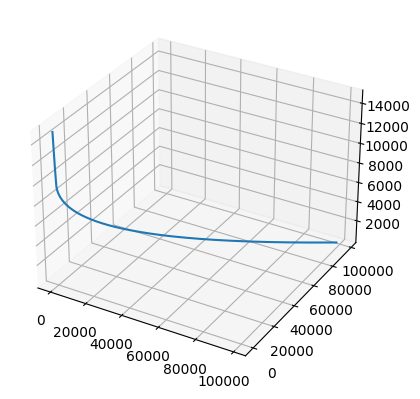

In [123]:
rocket = State()
rocket.pos = np.array((0,0,15000),dtype='float64')
rocket.vel = np.array((5,0,0),dtype='float64')
rocket.acc = np.array((0,0,0),dtype='float64')

x = []
y = []
z = []

while rocket.pos[2] > 0:
    x.append(rocket.pos[0])
    y.append(rocket.pos[1])
    z.append(rocket.pos[2])
    if(rocket.pos[2]< 10000):
        if rocket.vel[0] != 0:
            angle = -meth.atan(rocket.vel[1]/rocket.vel[0])
        else: #spiral function
            angle = meth.pi
        angle += meth.pi / 2
        rocket.acc = np.array(( meth.cos(angle), meth.sin(angle), 0),dtype='float64')
        
    
    fallRate = -rocket.rateOfDescent(rocket.pos[2])
    rocket.vel[2] = fallRate
    
    
    rocket.update()
    
ax = plt.figure().add_subplot(projection='3d')
ax.plot(x, y, z, label='parametric curve')

plt.show()